In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [13]:
# clf = SGDClassifier(max_iter=100, alpha=0.01)

[0 0 0 ... 1 1 1]


In [18]:
colors = list()
for i in range(len(X)):
    if y[i] == 1:
        colors.append("b")
    else:
        colors.append("r")
colors

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r'

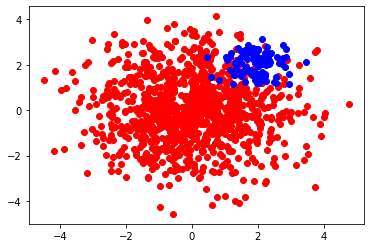

In [20]:
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c = colors[i])

In [21]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X, y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
# Helper function to plot the best fit line,
# as well as marking the closest data points to the line,
# through dotted lines (margins)
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

<bound method ClassifierMixin.score of SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


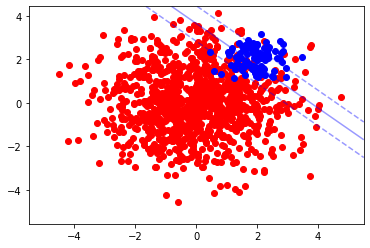

In [30]:
# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier, X, y)

# plot data points + color/labels
for k, (i,j) in enumerate(X):
    plt.scatter(i, j, c = colors[k])

In [33]:
print(svm_classifier.score(X,y))

0.9418181818181818


In [36]:
svm_classifier_weighted = svm.SVC(kernel='linear', C=10, class_weight='balanced')
svm_classifier_weighted.fit(X, y)

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

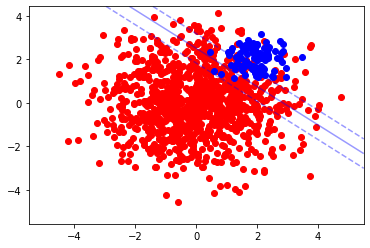

In [28]:
# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier_weighted, X, y)

# plot data points + color/labels
for k, (i,j) in enumerate(X):
    plt.scatter(i, j, c = colors[k])

In [34]:
print(svm_classifier_weighted.score(X,y))

0.9109090909090909


In [46]:
count = 0
for i in range(len(y)):
    y_pred = svm_classifier.predict((X[i][0], X[i][1]))
    if y_pred != y[i]:
        count += 1
print(count/len(y))

ValueError: Expected 2D array, got 1D array instead:
array=[2.64607852 0.60023581].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.